In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

# HW7

## Q1

$\Large
\begin{align*}
p(\boldsymbol{\beta}|\boldsymbol{y},\boldsymbol{X},\Sigma=\sigma^2I)&\propto e^{-\frac{1}{2}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\Sigma^{-1}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)}\cdot e^{-\frac{1}{2}\left(\boldsymbol{\beta}-\boldsymbol{\beta_0}\right)^T\Sigma_\beta^{-1}\left(\boldsymbol{\beta}-\boldsymbol{\beta_0}\right)}\\
&\propto e^{-\frac{1}{2}\left(\sigma^{-2}\boldsymbol{\beta}^T\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}-2\sigma^{-2}\boldsymbol{\beta}^T\boldsymbol{X}^T\boldsymbol{y}+\boldsymbol{\beta}^T\Sigma_\beta^{-1}\boldsymbol{\beta}-2\boldsymbol{\beta}^T\Sigma_\beta^{-1}\boldsymbol{\beta_0}\right)}\\
&=e^{-\frac{1}{2}\left(\boldsymbol{\beta}^T\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{X}+\Sigma_\beta^{-1}\right)\boldsymbol{\beta}-2\boldsymbol{\beta}^T\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{y}+\Sigma_\beta^{-1}\boldsymbol{\beta_0}\right)\right)}\\
&\propto e^{-\frac{1}{2}\left(\left(\boldsymbol{\beta}-\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{X}+\Sigma_\beta^{-1}\right)^{-1}\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{y}+\Sigma_\beta^{-1}\boldsymbol{\beta_0}\right)\right)^T\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{X}+\Sigma_\beta^{-1}\right)\left(\boldsymbol{\beta}-\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{X}+\Sigma_\beta^{-1}\right)^{-1}\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{y}+\Sigma_\beta^{-1}\boldsymbol{\beta_0}\right)\right)\right)}\\
&\sim MVN\left(\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{X}+\Sigma_\beta^{-1}\right)^{-1}\left(\sigma^{-2}\boldsymbol{X}^T\boldsymbol{y}+\Sigma_\beta^{-1}\boldsymbol{\beta_0}\right),\sigma^{-2}\boldsymbol{X}^T\boldsymbol{X}+\Sigma_\beta^{-1}\right)
\end{align*}$

$\Large
\begin{align*}
p(\sigma^2|\boldsymbol{y},\boldsymbol{X},\boldsymbol{\beta})&\propto\det(\Sigma)^{-\frac{1}{2}}e^{-\frac{1}{2}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\Sigma^{-1}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)}(\sigma^2)^{-\alpha^*-1}e^{-\frac{\beta^*}{\sigma^2}}\\
&=(\sigma^2)^{-\left(\alpha^*+\frac{n}{2}\right)-1}e^{-\frac{1}{\sigma^2}\left(\beta^*+\frac{1}{2}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right)}\\
&\sim Inv-Gam\left(\alpha^*+\frac{n}{2},\beta^*+\frac{1}{2}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right)
\end{align*}$

## Q2

In [2]:
m = 1000

In [3]:
data1 = pd.read_csv("score.csv")
n1, p1 = data1.shape[0], data1.shape[1] - 1
X1, y1 = np.column_stack([np.ones(n1), data1.iloc[:, :p1].values]), data1.iloc[:, p1].values

with pm.Model() as MLR:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p1+1)
    sigma = pm.Exponential("sigma", lam=2)
    y = pm.Normal("y", mu=X1@betas, sigma=sigma, observed=y1)
    idata1 = pm.sample(draws=m, chains=2, tune=100)

az.summary(idata1, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 27 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-13.509,3.848,-17.658,-9.782,2.317,2.018,2.505,10.865,2.280
betas[1],2.439,0.126,2.363,2.547,0.060,0.049,3.014,21.613,1.764
betas[2],0.896,0.025,0.872,0.923,0.015,0.012,2.729,22.088,1.980
betas[3],-0.722,0.207,-0.912,-0.484,0.126,0.101,3.034,29.907,1.771
betas[4],-0.084,0.056,-0.155,-0.003,0.033,0.027,3.181,11.661,1.677
sigma,3.902,0.561,3.287,4.409,0.326,0.258,2.755,22.567,1.959


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

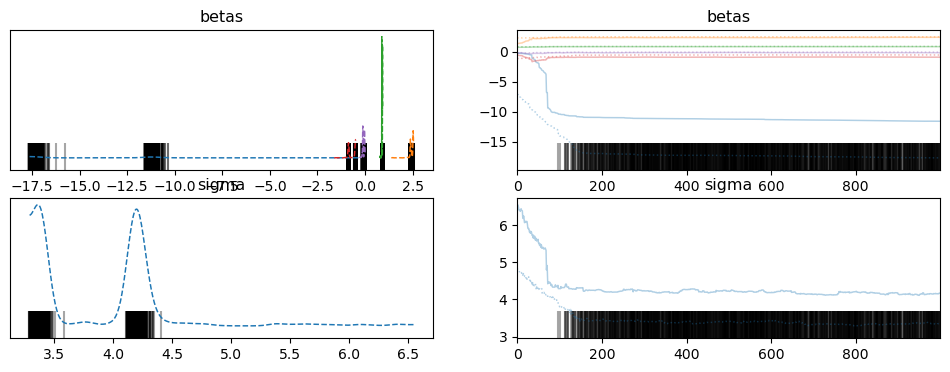

In [4]:
az.plot_trace(idata1, combined=True)

In [5]:
data2 = pd.read_csv("diabetes.csv")
n2, p2 = data2.shape[0], data2.shape[1] - 1
X2, y2 = np.column_stack([np.ones(n2), data2.iloc[:, :p2].values]), data2.iloc[:, p2].values

with pm.Model() as GLM:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p2+1)
    y = pm.Bernoulli("y", p=1/(1+pm.math.exp(-X2@betas)), observed=y2)
    idata2 = pm.sample(draws=m, chains=2, tune=100)

az.summary(idata2, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.233,0.740,-0.508,0.974,0.521,0.441,2.287,10.889,2.954
betas[1],-0.254,0.597,-0.851,0.344,0.421,0.356,2.391,2.016,2.574
betas[2],0.170,0.430,-0.265,0.600,0.303,0.256,2.180,10.941,3.684
betas[3],-0.398,0.246,-0.644,-0.148,0.174,0.147,2.181,2.016,3.684
betas[4],-0.214,0.523,-0.737,0.310,0.368,0.312,2.228,2.016,3.318
betas[5],-0.362,0.511,-0.873,0.151,0.360,0.305,2.181,2.016,3.683
betas[6],0.209,0.789,-0.581,0.997,0.555,0.470,2.233,10.968,3.265
betas[7],-0.948,0.037,-0.986,-0.911,0.026,0.022,2.559,27.650,2.233
betas[8],-0.137,0.066,-0.203,-0.069,0.047,0.040,2.183,2.016,3.684


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

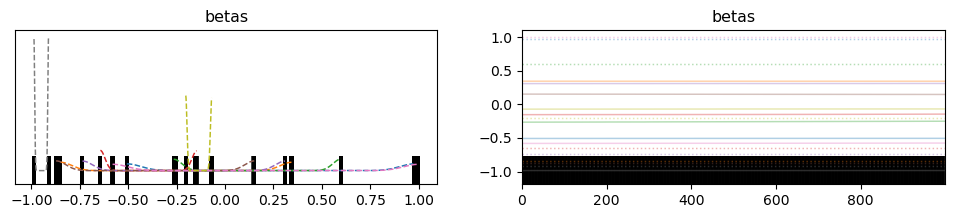

In [6]:
az.plot_trace(idata2, combined=True)

## Q3

In [7]:
data3 = data1.iloc[:1000, :]
n3, p3 = data3.shape[0], data3.shape[1] - 1
X3, y3 = np.column_stack([np.ones(n3), data3.iloc[:, :p3].values]), data3.iloc[:, p3].values
y3[np.arange(49, len(y3), 50)] = 10000

with pm.Model() as robust:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p3+1)
    v = pm.HalfNormal("v", sigma=5)
    tau = pm.Gamma("tau", alpha=1, beta=1)
    tau_i = pm.Gamma("tau_i", alpha=v/2, beta=v/2, shape=n3)
    y = pm.Normal("y", mu=X3@betas, sigma=1/pm.math.sqrt(tau*tau_i), observed=y3)
    idata3 = pm.sample(draws=m, chains=2, tune=100)

az.summary(idata3, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, v, tau, tau_i]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 111 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-28.478,0.388,-29.294,-27.952,0.061,0.045,50.566,173.438,1.264
betas[1],2.753,0.026,2.698,2.800,0.005,0.004,25.716,47.311,1.122
betas[2],0.992,0.003,0.985,0.999,0.000,0.000,82.664,112.905,1.106
betas[3],0.090,0.038,0.040,0.170,0.016,0.012,6.371,96.632,1.241
betas[4],0.106,0.022,0.067,0.148,0.006,0.004,15.682,195.508,1.099
...,...,...,...,...,...,...,...,...,...
tau_i[996],0.748,0.732,0.029,2.083,0.229,0.166,9.519,66.343,1.406
tau_i[997],0.919,1.003,0.023,2.695,0.312,0.227,10.177,56.699,1.354
tau_i[998],1.031,0.674,0.010,2.010,0.060,0.043,35.221,62.478,1.472
tau_i[999],0.000,0.000,0.000,0.000,0.000,0.000,3.928,25.542,1.471


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'tau_i'}>,
        <Axes: title={'center': 'tau_i'}>],
       [<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

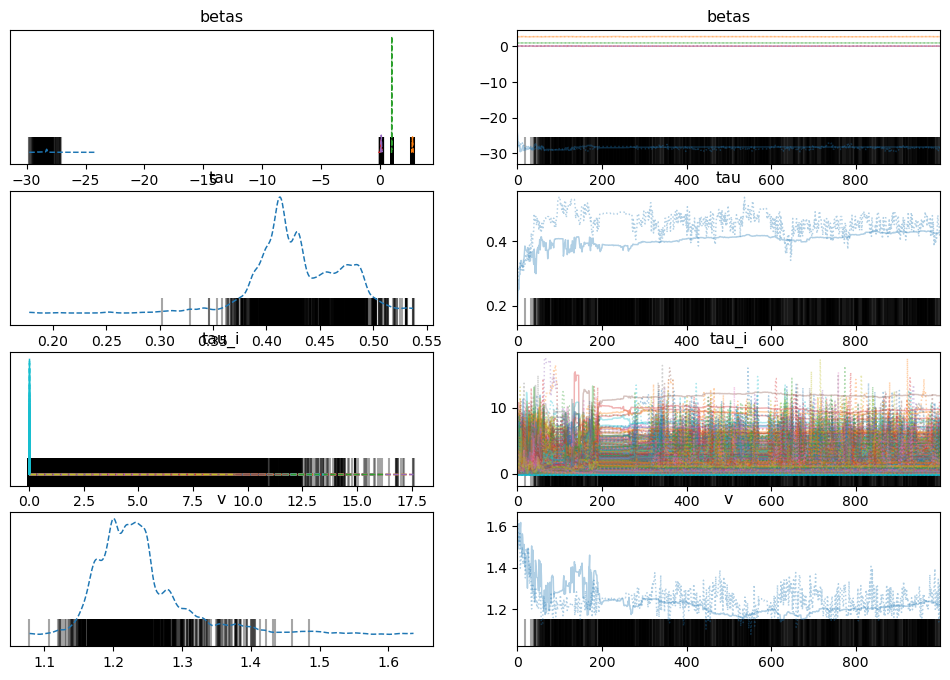

In [8]:
az.plot_trace(idata3, combined=True)